# Generating random variables with different statistical distributions and approaches

## i) Generate 60 unique random numbers $z_i, i - 1,⋯,N$ using LCG approach. Choose the parameters of your choice.

Plot $z_i$ as a function of $i$.
Color the first 20 points red, next 20 points - blue, last 20 points - green.
Write a short report analyzing the randomness of the generated numbers.

## ii) Generate 200 2-D points using:

a)[Sobol's approach]

b) the built-in random number generator


In [1]:
# import libraries
import numpy as np
from numpy import log as ln
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'axes.titlesize': 20})


### Generate 60 unique random numbers $z_i, i - 1,⋯,N$ using LCG approach.

By LCG definition:

$$
\mathrm{Z_i = (aZ_{i-1} + c)  mod  m}
$$

where $a, c, m$ are parameters of the algorithm,which we need to define firstly.


In [2]:
def lcg(a, m, c, z_0, N=60):
    z = np.zeros(N).astype(int)
    for i in range(N):
        z[0] = z_0
        z[i] = (a * z[i - 1] + c) % m
    return z

In [3]:
# N = 60 a= 17 m = 100 c = 43

test_0 = lcg(17, 100, 43, 1)

In [4]:
test_0

array([ 1, 60, 63, 14, 81, 20, 83, 54, 61, 80,  3, 94, 41, 40, 23, 34, 21,
        0, 43, 74,  1, 60, 63, 14, 81, 20, 83, 54, 61, 80,  3, 94, 41, 40,
       23, 34, 21,  0, 43, 74,  1, 60, 63, 14, 81, 20, 83, 54, 61, 80,  3,
       94, 41, 40, 23, 34, 21,  0, 43, 74])

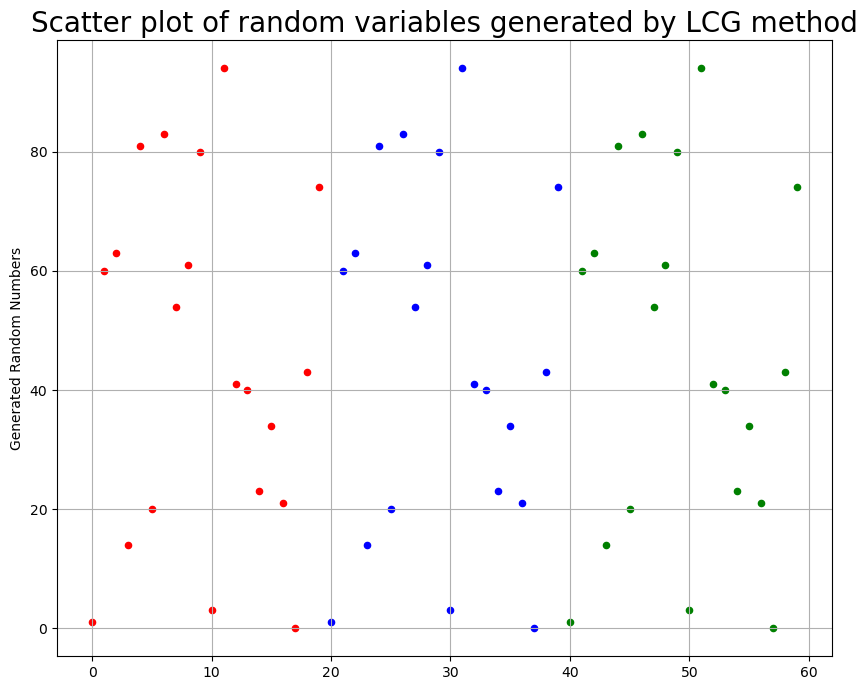

In [5]:
_, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'blue', 'green']

ax.scatter(np.arange(20), test_0[:20], s=20, c=colors[0])
ax.scatter(np.arange(20, 40), test_0[20:40], s=20, c=colors[1])
ax.scatter(np.arange(40, 60), test_0[40:60], s=20, c=colors[2])

ax.grid()
ax.set(title="Scatter plot of random variables generated by LCG method",
       ylabel="Generated Random Numbers")

plt.show()

From the numbers generated by LCG, we can see there is a numbers sequence which is periodic:[0, 43, 74, 1, 60, 63, 14, 81, 20, 83, 54, 61, 80, 3, 94, 41, 40,
23, 34, 21],the length of the sequence is 20.


### Generate 200 2-D points using sobol approach.


In [6]:
from scipy.stats.qmc import Sobol

In [7]:
sobol = Sobol(d=2, scramble=False)
x = sobol.random(n=200)
for i in x[:15]:
    print(i)

[0. 0.]
[0.5 0.5]
[0.75 0.25]
[0.25 0.75]
[0.375 0.375]
[0.875 0.875]
[0.625 0.125]
[0.125 0.625]
[0.1875 0.3125]
[0.6875 0.8125]
[0.9375 0.0625]
[0.4375 0.5625]
[0.3125 0.1875]
[0.8125 0.6875]
[0.5625 0.4375]


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_5393/3312047589.py:2: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  x = sobol.random(n=200)


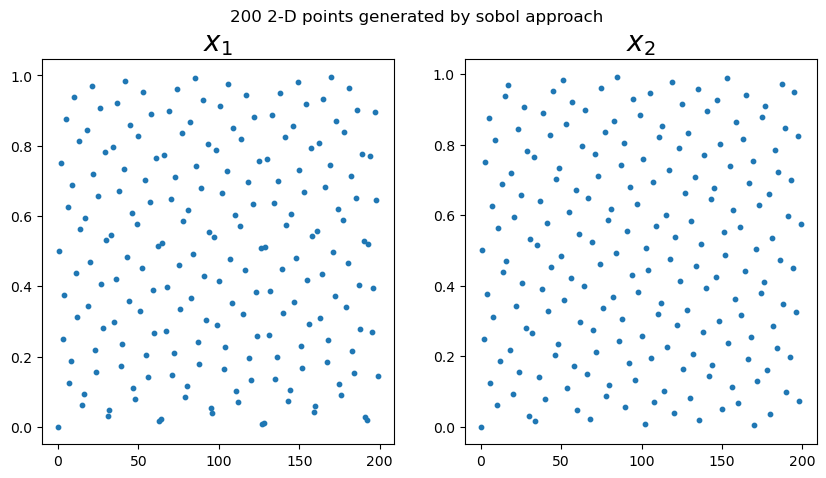

In [8]:
_, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(np.arange(200), x[:, 0], s=10)
axes[0].set(title="$x_1$")
axes[1].scatter(np.arange(200), x[:, 1], s=10)
axes[1].set(title="$x_2$")

_.suptitle("200 2-D points generated by sobol approach")
plt.show()

### Generate 200 2-D points from the built-in random number generator.


In [9]:
y = np.random.randint(0, 10, size=[2, 200])
y

array([[4, 1, 6, 4, 1, 8, 1, 7, 4, 7, 8, 9, 3, 0, 7, 3, 7, 8, 7, 4, 2, 1,
        3, 2, 9, 9, 7, 7, 9, 0, 4, 2, 4, 1, 8, 6, 1, 3, 0, 3, 3, 2, 3, 8,
        6, 1, 5, 6, 4, 1, 7, 7, 3, 5, 3, 7, 9, 7, 5, 7, 8, 6, 0, 7, 0, 0,
        5, 0, 1, 6, 7, 5, 1, 7, 3, 1, 7, 2, 7, 1, 3, 3, 2, 9, 9, 7, 6, 8,
        1, 2, 9, 4, 5, 1, 1, 7, 7, 6, 2, 9, 8, 3, 1, 8, 8, 6, 8, 6, 2, 3,
        0, 2, 2, 5, 0, 1, 3, 8, 5, 0, 7, 3, 4, 1, 8, 3, 5, 5, 7, 0, 4, 0,
        9, 9, 1, 2, 6, 2, 4, 2, 7, 3, 9, 5, 7, 5, 1, 8, 3, 8, 2, 1, 8, 2,
        1, 6, 2, 2, 0, 9, 1, 1, 1, 3, 8, 0, 3, 1, 4, 1, 9, 8, 2, 1, 9, 6,
        5, 6, 5, 3, 5, 5, 2, 6, 2, 5, 4, 2, 5, 4, 2, 0, 4, 1, 9, 1, 0, 7,
        3, 4],
       [8, 9, 5, 4, 3, 2, 1, 1, 6, 0, 3, 2, 2, 6, 4, 9, 1, 3, 6, 5, 5, 6,
        8, 8, 9, 0, 1, 7, 7, 1, 6, 8, 6, 1, 3, 7, 4, 1, 1, 5, 8, 2, 4, 3,
        3, 9, 9, 5, 5, 6, 8, 7, 5, 6, 8, 9, 3, 5, 2, 8, 0, 8, 2, 0, 8, 6,
        6, 3, 0, 3, 1, 3, 6, 2, 4, 6, 7, 0, 0, 4, 1, 1, 5, 4, 3, 2, 5, 5,
        2, 8, 5, 6, 3, 

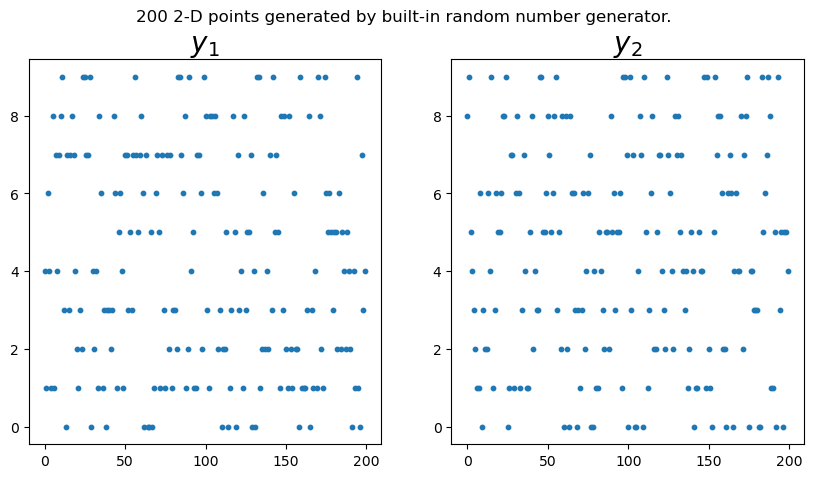

In [10]:
_, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(np.arange(200), y[0, :], s=10)
axes[0].set(title="$y_1$")
axes[1].scatter(np.arange(200), y[1, :], s=10)
axes[1].set(title="$y_2$")

_.suptitle("200 2-D points generated by built-in random number generator.")
plt.show()

## Generate $N$ continuous uniform, exponential, Bernoulli random variables and random variables from the discrete distribution **with the support set ${1,2,3,4}$ and pmf $P[W_i = j] = \frac{j}{10} ,j = 1,2,3, i = 1, ⋯, N.$**



In [11]:
N = 1000  # set the initial number of random variables generated by different methods below


In [12]:
def plot_dist_compare(rvs_scratch, rvs_builtin):
    """
    set the random variables plots generate by different methods below, and compare them with the built-in functions.
    """

    _, axes = plt.subplots(2, 2, figsize=(24, 16))

    axes[0, 0].plot(np.arange(N), rvs_scratch, color='blue', alpha=0.3)
    axes[0, 0].set(
        title="Plot of Random Variables Generated WITHOUT Built-in functions")

    axes[0, 1].hist(rvs_scratch,
                    bins=100,
                    density=True,
                    color='red',
                    alpha=0.3)
    axes[0, 1].set(
        title=
        "Histogram of Random Variables Generated WITHOUT built-in functions")

    axes[1, 0].plot(np.arange(N), rvs_builtin, color='blue', alpha=0.3)
    axes[1, 0].set(
        title="Plot of Random Variables Generated WITH built-in functions")

    axes[1, 1].hist(rvs_builtin,
                    bins=100,
                    density=True,
                    color='red',
                    alpha=0.3)
    axes[1, 1].set(
        title="Histogram of Random Variables Generated WITH built-in functions"
    )

    plt.show()

### Generate continuous uniform random variables, with a=20, b =20


In [13]:
a = 20
b = 30

rand_nums = np.random.uniform(a, b, N)

uniform_rvs = (rand_nums - a) / (b - a)

In [14]:
from scipy.stats import uniform

stats_uniform_rvs = uniform.rvs(loc=a, scale=b - a, size=N)


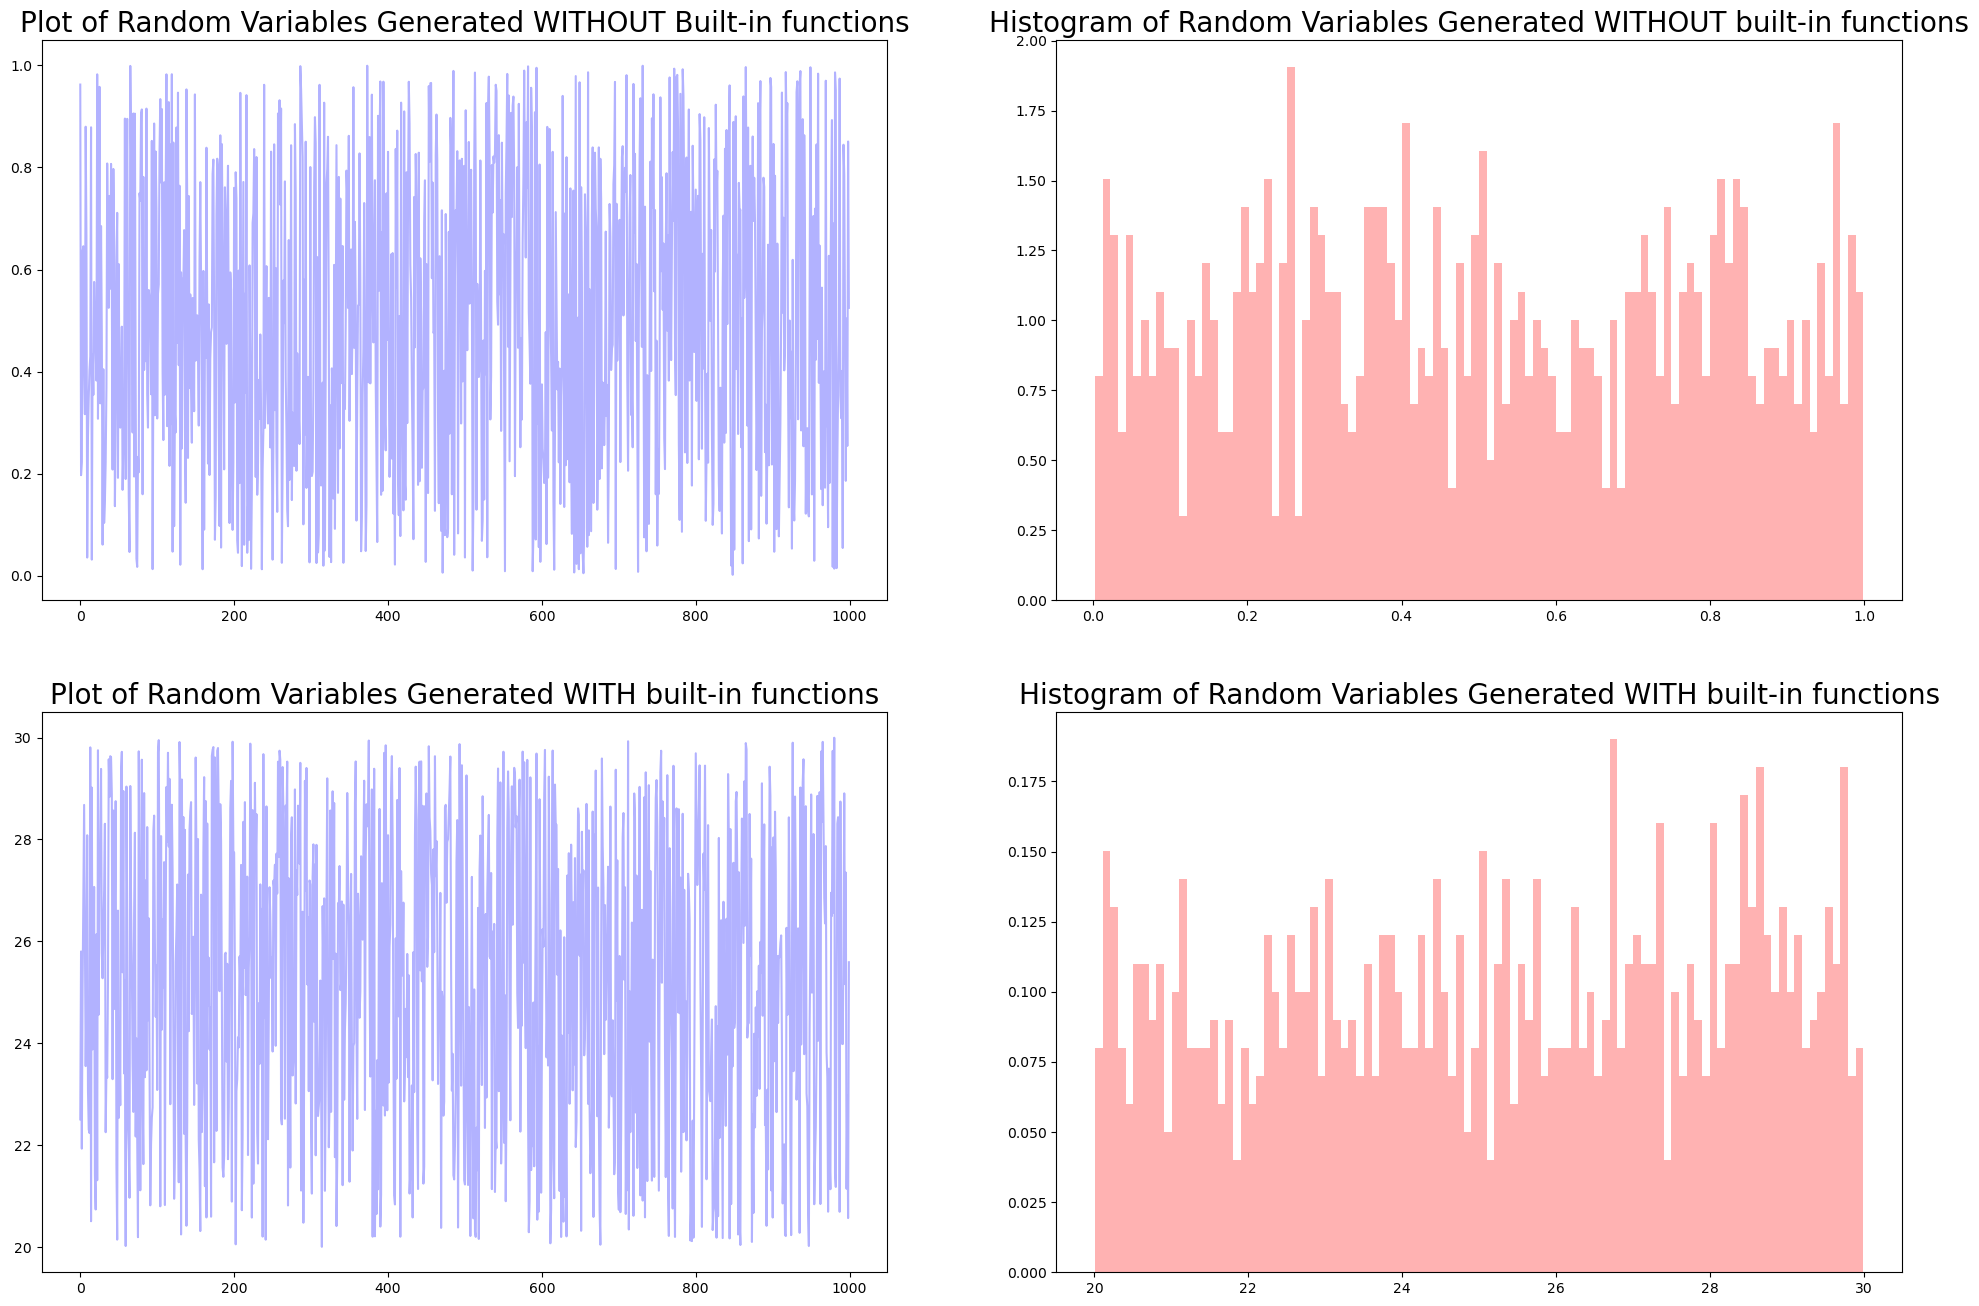

In [15]:
plot_dist_compare(uniform_rvs, stats_uniform_rvs)

### Generate exponential random variables with lambda = 2 by inverse transform method.


In [16]:
lam = 2

mean = 1 / lam

exp_rvs = -mean * ln(uniform_rvs)


In [17]:
from scipy.stats import expon

stats_exp_rvs = expon.rvs(scale=1 / lam, size=N)


In [18]:
# compare the means of the random variables generated by different
np.mean(stats_exp_rvs), np.mean(exp_rvs)

(0.5081764877685174, 0.49385638988606345)

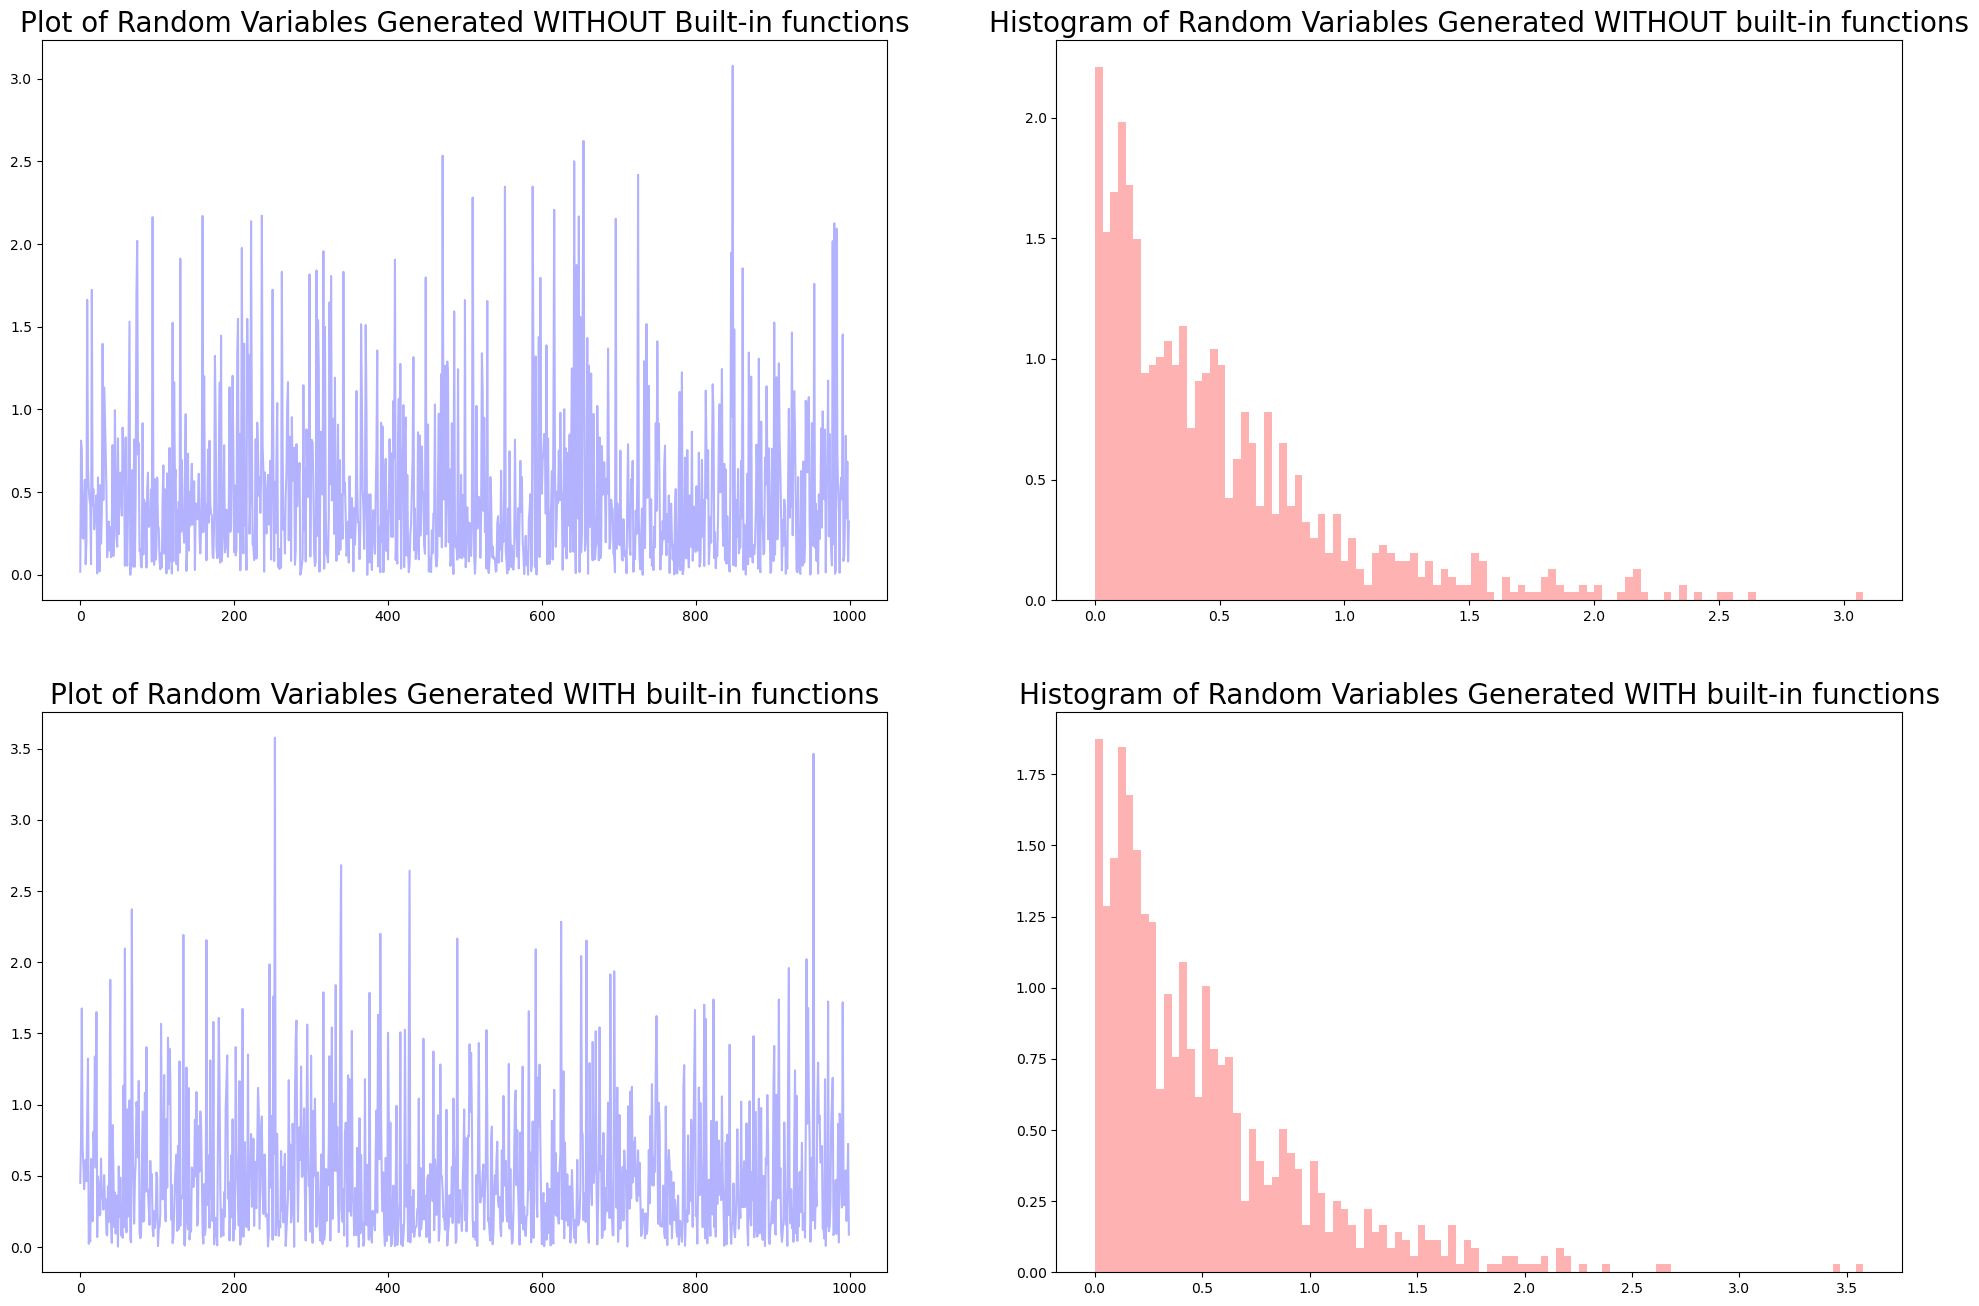

In [19]:
plot_dist_compare(exp_rvs, stats_exp_rvs)

### Generate bernoulli random variables with probability p = 0.3


In [20]:
p = 0.3

bernoulli_rvs = np.array([])

for rvs in uniform_rvs:
    if rvs < p:
        a = 1
        bernoulli_rvs = np.append(bernoulli_rvs, a)
    else:
        a = 0
        bernoulli_rvs = np.append(bernoulli_rvs, a)


In [21]:
from scipy.stats import bernoulli

stats_bernoulli_rvs = bernoulli.rvs(p, size=N)


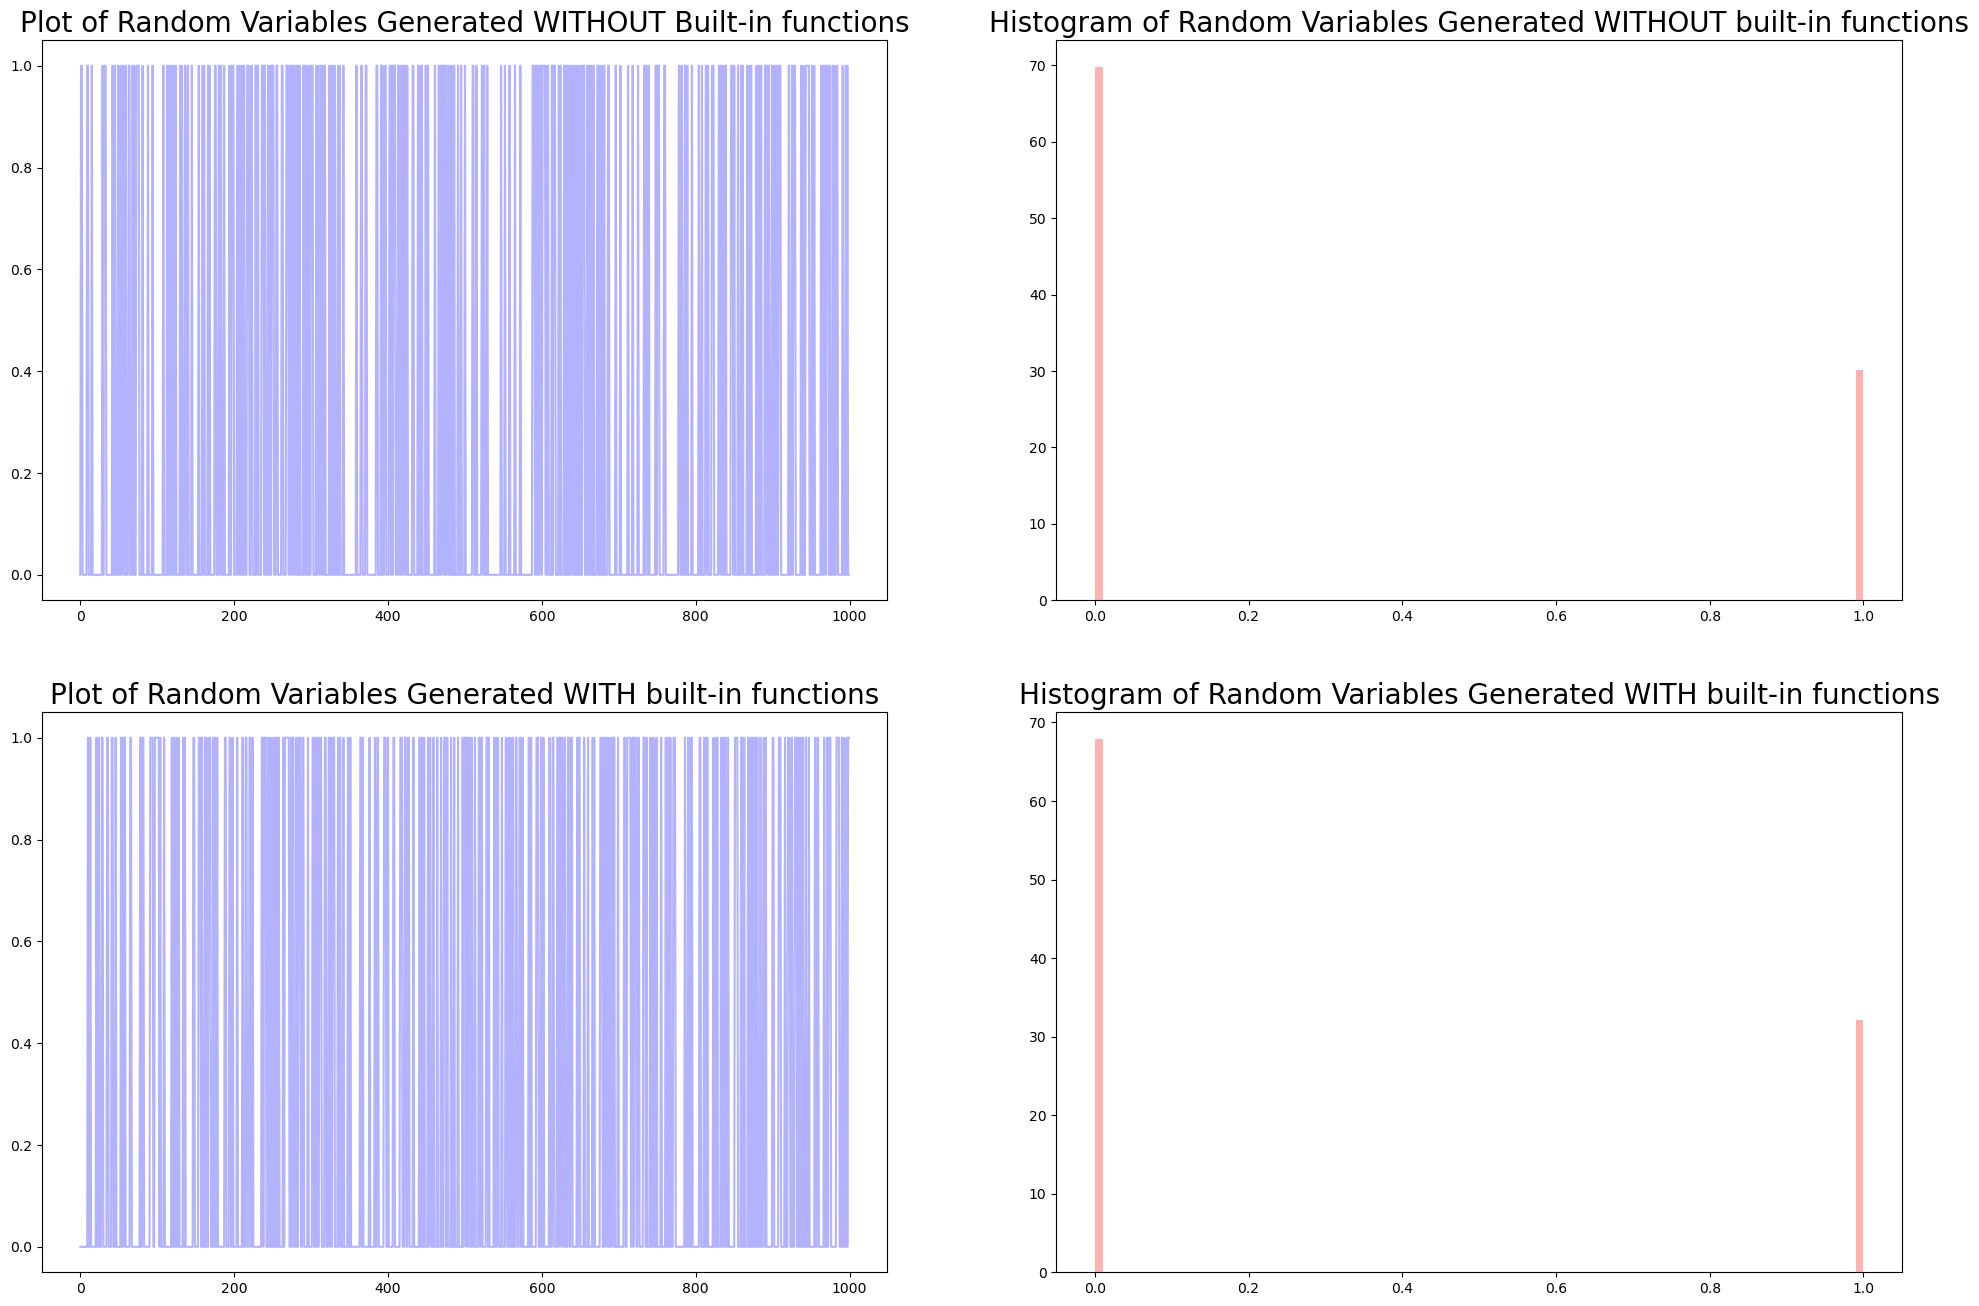

In [22]:
plot_dist_compare(bernoulli_rvs, stats_bernoulli_rvs)

### Generate random variables from the discrete distribution **with the support set ${1,2,3,4}$ and pmf $P[W_i = j] = \frac{j}{10} ,j = 1,2,3, i = 1, ⋯, N.$**

that is:

$$
\begin{aligned}

\mathrm{P[W_i = 1]} &= \frac{1}{10} \\
\mathrm{P[W_i = 2]} &= \frac{2}{10} \\
\mathrm{P[W_i = 3]} &= \frac{3}{10} \\
\mathrm{P[W_i = 4]} &= \frac{4}{10} ,where:\ i = 1 \cdots N

\end{aligned}
$$


In [23]:
discrete_rvs = np.array([])

for rvs in uniform_rvs:
    if rvs < 0.1:
        a = 1
        discrete_rvs = np.append(discrete_rvs, a)
    elif 0.1 < rvs <= 0.3:
        a = 2
        discrete_rvs = np.append(discrete_rvs, a)
    elif 0.3 < rvs <= 0.6:
        a = 3
        discrete_rvs = np.append(discrete_rvs, a)
    else:
        a = 4
        discrete_rvs = np.append(discrete_rvs, a)


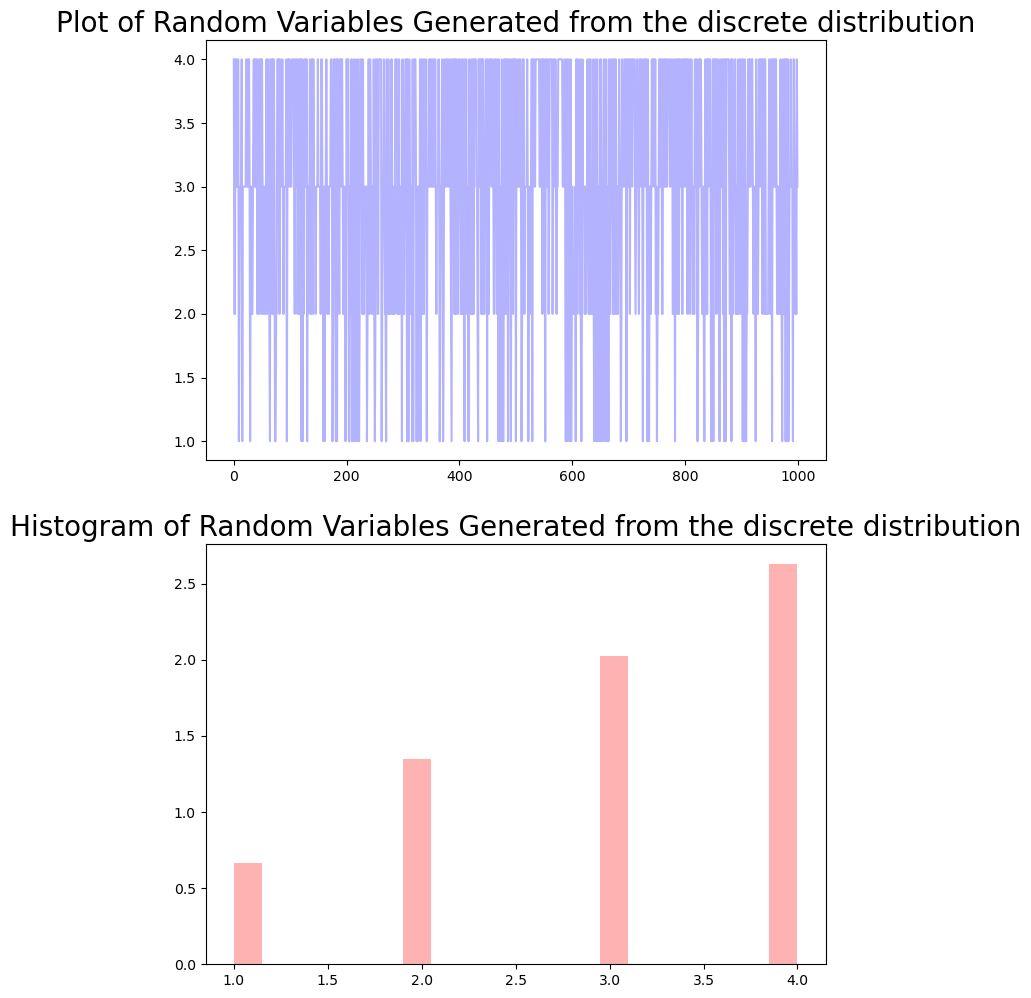

In [24]:
    _, axes = plt.subplots(2,1,figsize=(8, 12))

    axes[0].plot(np.arange(N), discrete_rvs, color='blue',alpha=0.3)
    
    axes[0].set(title="Plot of Random Variables Generated from the discrete distribution")
    axes[1].hist(discrete_rvs, bins=20, density=True, color='red',alpha=0.3)
    axes[1].set(title="Histogram of Random Variables Generated from the discrete distribution")
    
    plt.show()


## Write a Matlab or Python code to generate random variables from **Poisson, Binomial and Gamma** (with the integer shape parameter) distributions using the methods covered in class. Do not use built-in functions. Write the code from scratch.


### Generate poisson random variables


In [25]:
def poisson_rvs_gen(lam=2):
    time = 0
    event_count = -1
    mean = 1 / lam

    while True:
        event_t = -mean * ln(np.random.uniform())
        time += event_t
        event_count += 1
        if time > 1:
            break
    return event_count


In [26]:
poisson_rvs = [poisson_rvs_gen(lam=2) for _ in range(N)]


In [27]:
np.mean(poisson_rvs)

1.992

In [28]:
from scipy.stats import poisson

stats_poisson_rvs = poisson.rvs(lam, size=N)
np.mean(stats_poisson_rvs)

2.087

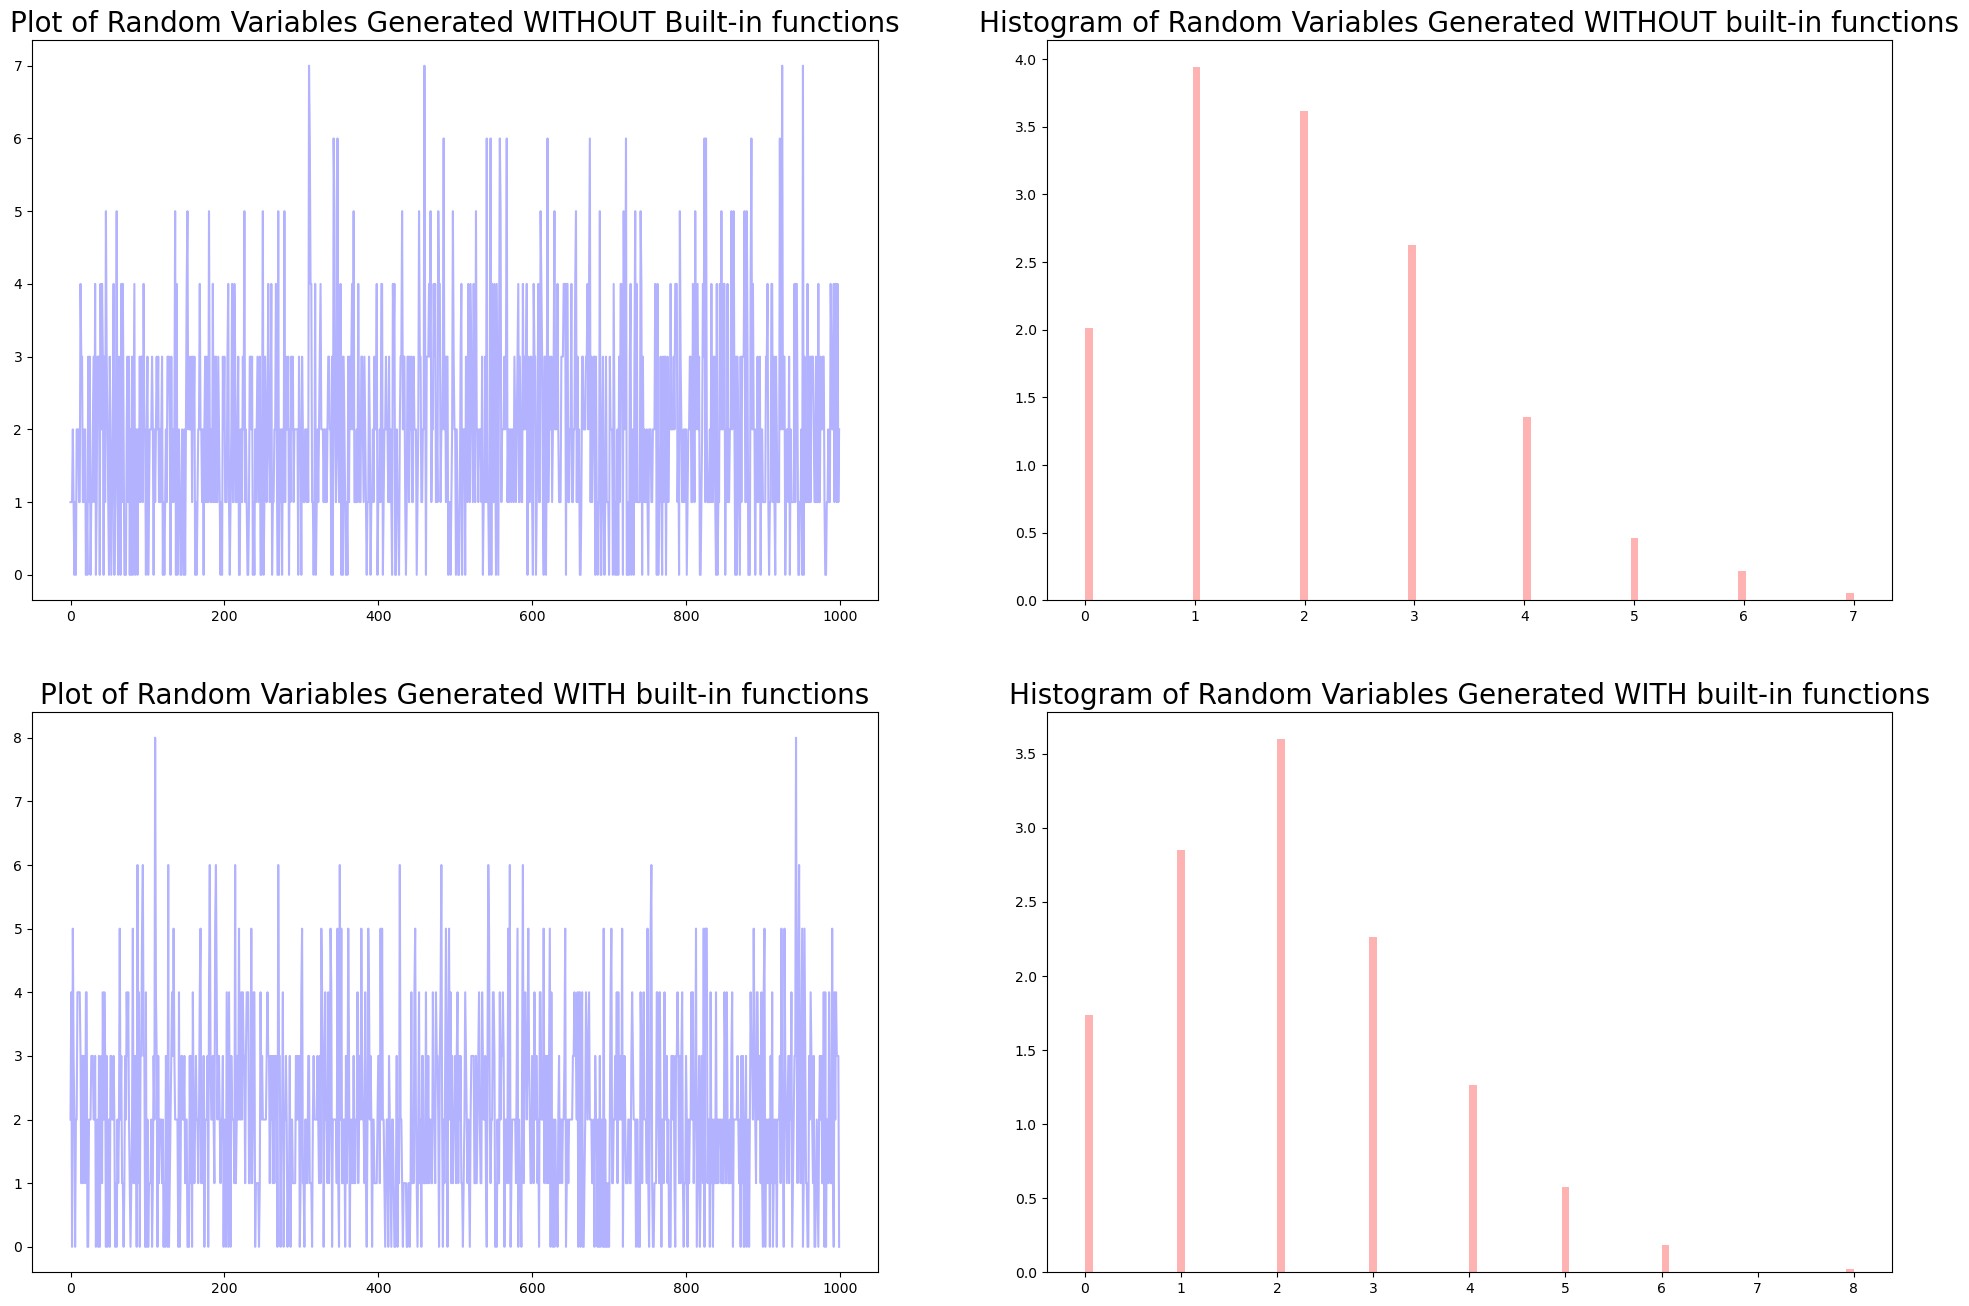

In [29]:
plot_dist_compare(poisson_rvs, stats_poisson_rvs)

### Generate binomial rvs from bernoulli distribution with p = 0.3


In [30]:
binom_rvs = []
p = 0.3
trials = 1000

for i in range(trials):
    U = np.random.uniform(0, 1, N)
    binom_rvs.append(len([i for i in U if i <= p]))

In [31]:
np.mean(binom_rvs)

300.068

In [32]:
from scipy.stats import binom

stats_binom_rvs = binom.rvs(n=1000, p=0.3, size=N)


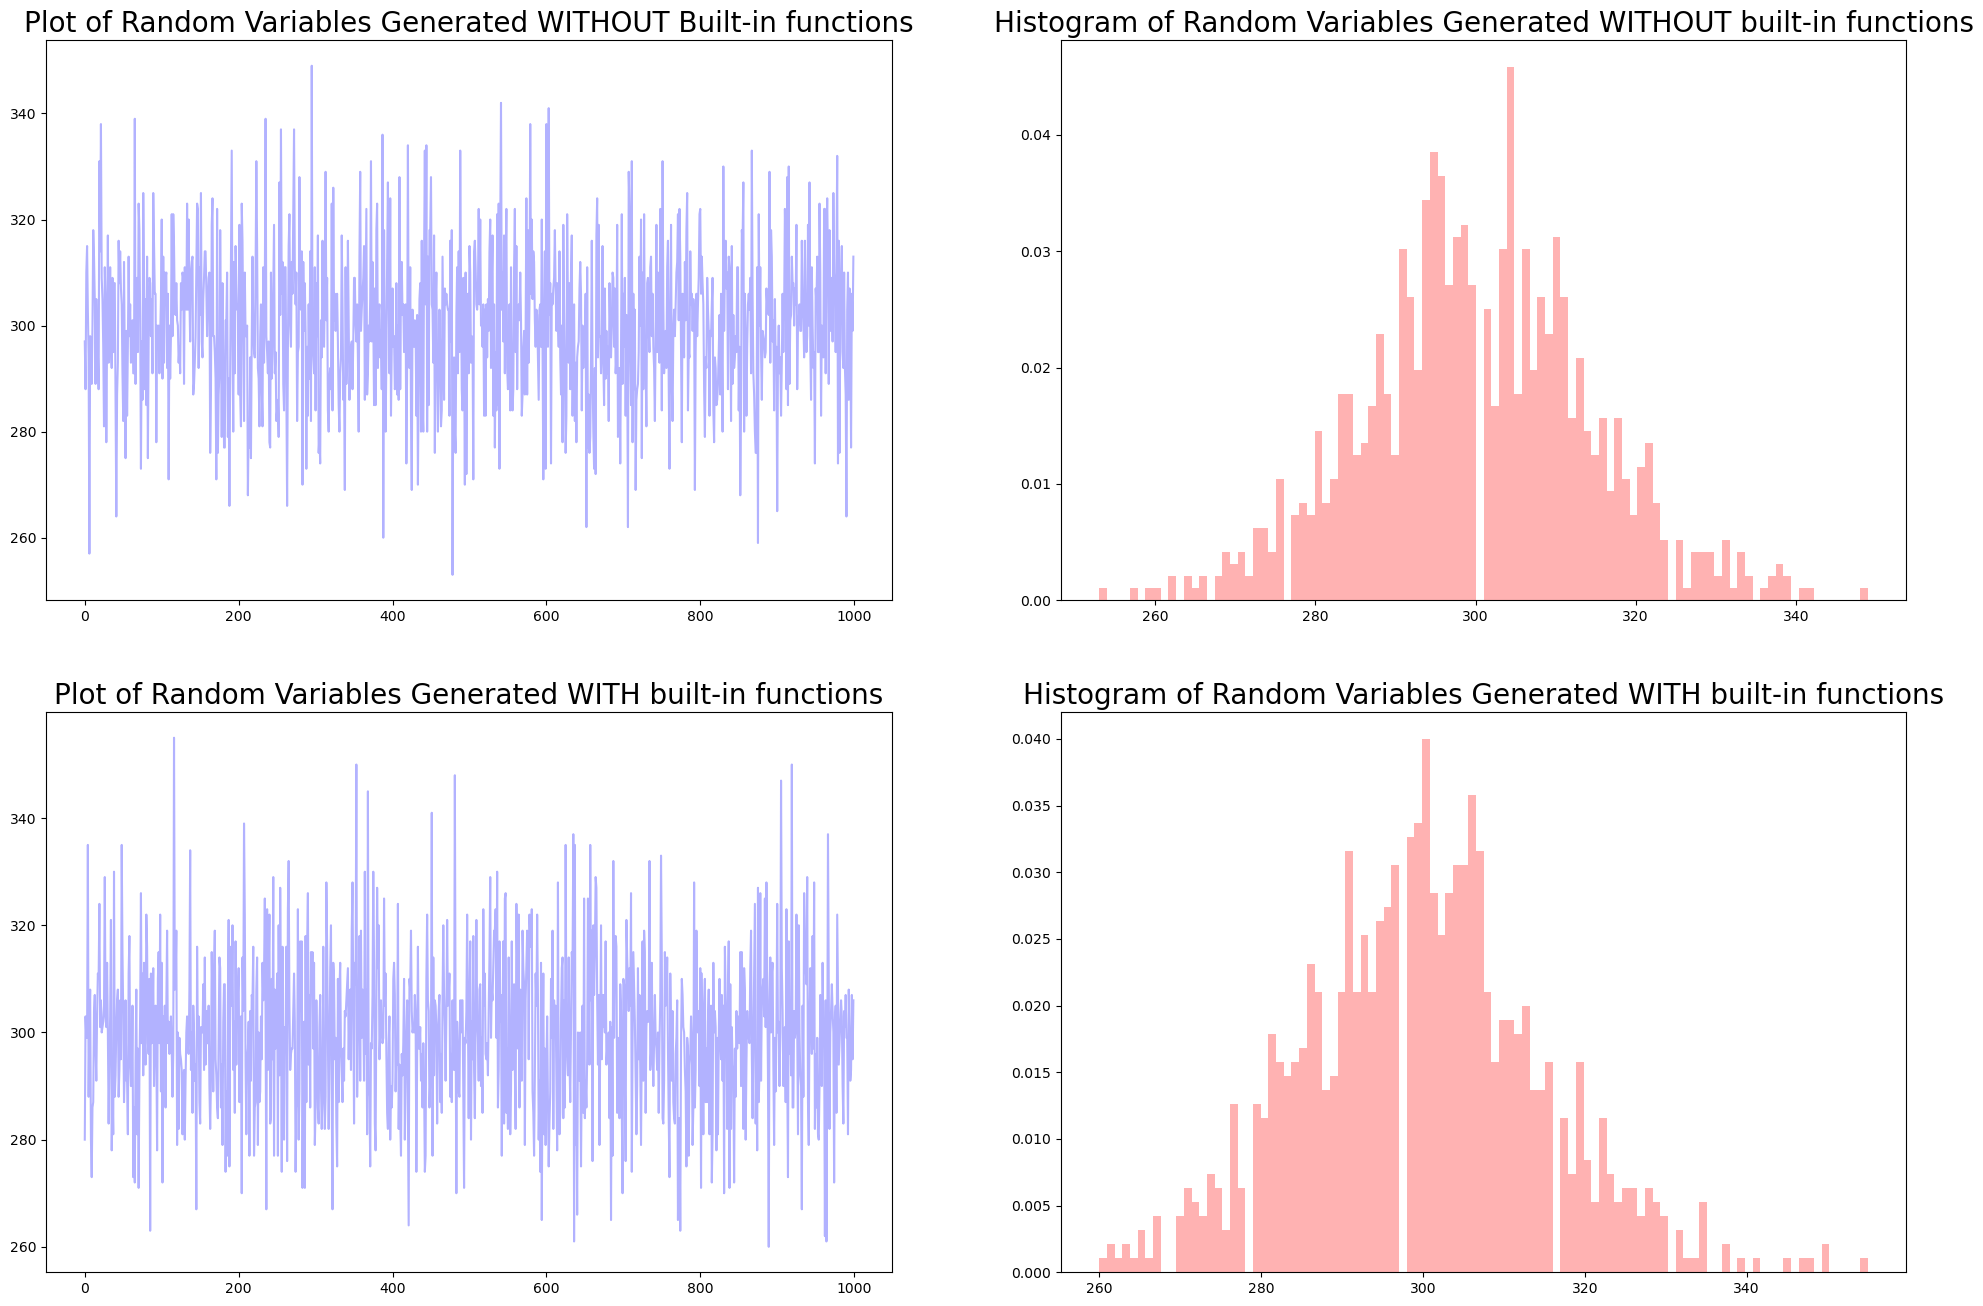

In [33]:
plot_dist_compare(binom_rvs, stats_binom_rvs)

### Generate gamma rvs with alpha = 4, beta = 2


In [34]:
a = 4
b = 2

gamma_rvs = []

for _ in range(N):
    r = 0
    for _ in range(a):
        E = -1 / b * ln(np.random.uniform())
        r = r + E
    gamma_rvs.append(r)


In [35]:
from scipy.stats import gamma

stats_gamma_rvs = gamma.rvs(a, scale=1 / b, size=N)


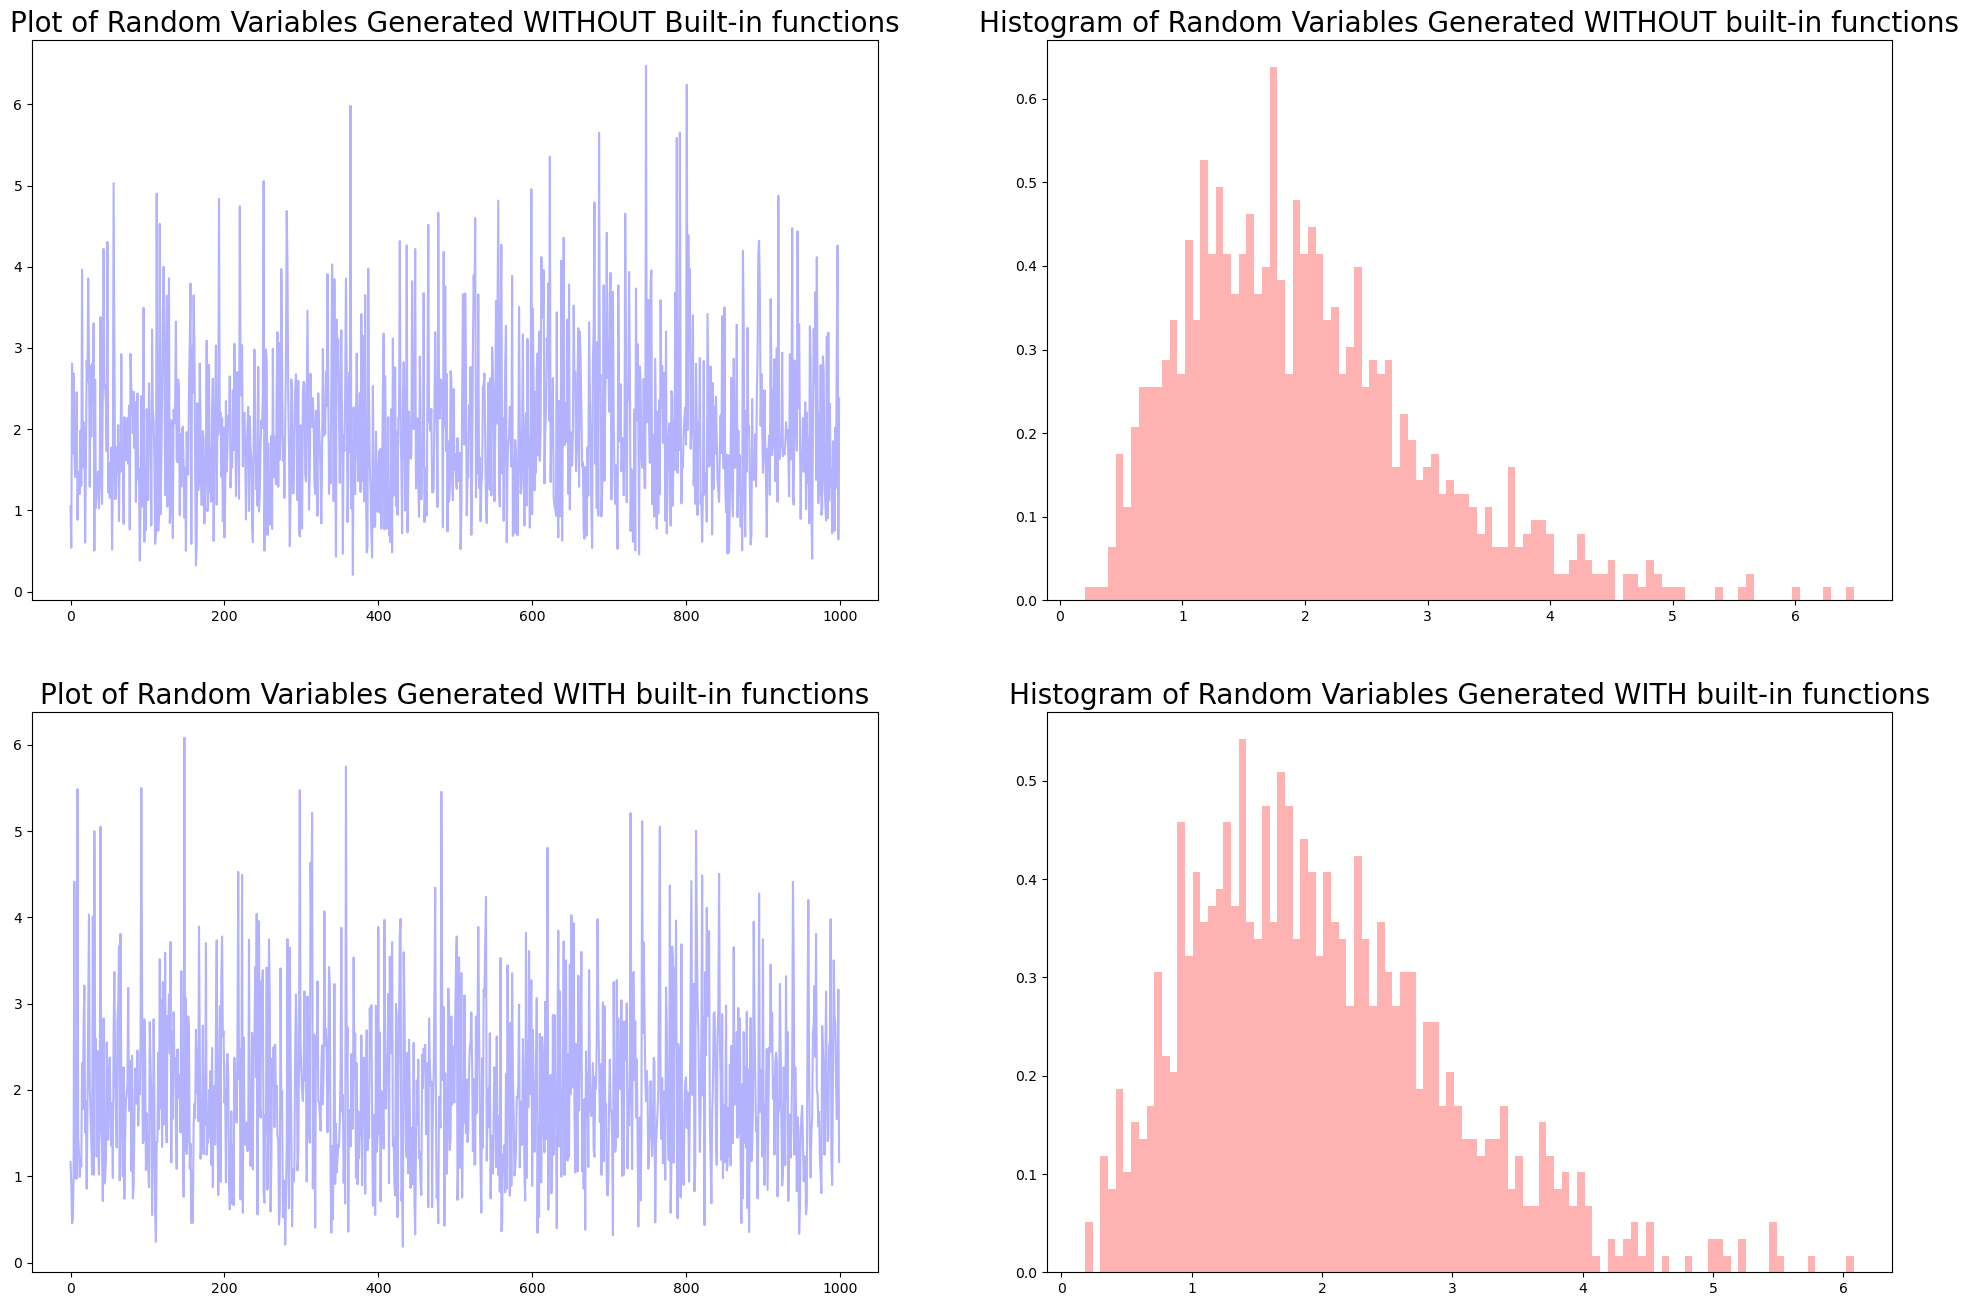

In [36]:
plot_dist_compare(gamma_rvs, stats_gamma_rvs)